In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

#### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def cos_metric(v1, v2):
    return np.dot(v1, v2) / np.linalg.norm(v1) / np.linalg.norm(v2)

In [4]:
def find_soul_mates(features):
    mults = np.dot(features, np.transpose(features))
    norms = np.linalg.norm(features, axis=1)
    similarity_matrix = np.transpose(mults / norms) / norms
    soul_mate = np.argmax(similarity_matrix - np.eye(features.shape[0]), axis=0)

    for i, j in enumerate(soul_mate):
        print(i, j)
        
find_soul_mates(raitings)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
# Будем использовать метод главных компонент
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
raitings_reduced = pca.fit_transform(raitings)

find_soul_mates(raitings_reduced)

0 8
1 4
2 9
3 6
4 1
5 7
6 3
7 5
8 0
9 8


#### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).


In [6]:
from sympy import diff, symbols, cos, sin, tan
x = symbols('x')
diff(tan(sin(x) + cos(2*x+3))**2)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [7]:
diff(tan(sin(x) + cos(2*x+3))**2).evalf(subs={x:1})

55.3859176353379

In [8]:
from math import cos, sin, tan
from scipy.misc import derivative

def slozhnjamba(x):
    return tan(sin(x) + cos(2*x+3))**2

derivative(slozhnjamba, 1, dx=1e-6)

55.3859176464222

#### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error


In [9]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [10]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [11]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

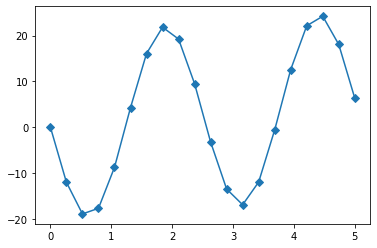

In [12]:
plt.plot(x, fx, marker='D')
plt.show()

In [13]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [14]:
from scipy.optimize import minimize
res = minimize(
    error, x0=(1, -3),
    method='BFGS',
    # options={'xtol': 1e-6, 'disp': True}
)
res

      fun: 2.6252891860423233e-06
 hess_inv: array([[7.10005757e-11, 1.27493324e-11],
       [1.27493324e-11, 3.69631383e-11]])
      jac: array([ -17.8694315 , -490.11140627])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 288
      nit: 30
     njev: 93
   status: 2
  success: False
        x: array([ 2.99999999, -2.5       ])

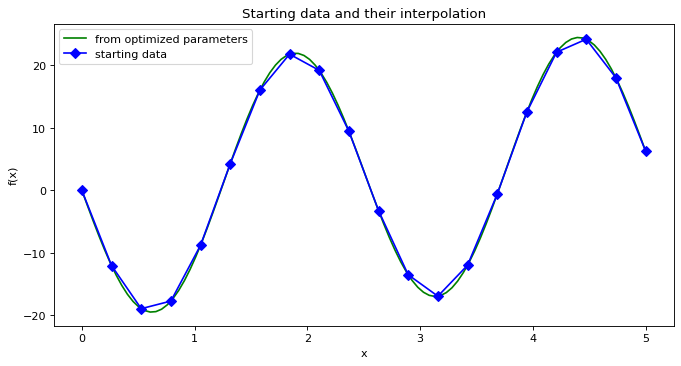

In [15]:
fig = plt.figure(figsize=(10, 5), dpi=80)
ax = fig.add_subplot(111)
x_plot = np.linspace(0, 5, 100)
ax_1 = ax.plot(
    x_plot, f(x_plot, *res.x),
    color='green',
    label='from optimized parameters'
)
ax_2 = ax.plot(
    x, fx,
    marker='D',
    color='blue',
    label='starting data'
)
xl = ax.set_xlabel('x')
yl = ax.set_ylabel('f(x)')
l = ax.legend()
t = plt.title('Starting data and their interpolation')

#### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.


In [16]:
r_var = list(range(20))
from random import choices
sample = np.array(choices(r_var, k=1000*50))
sample.shape = 50, 1000
means = np.mean(sample, axis=0)

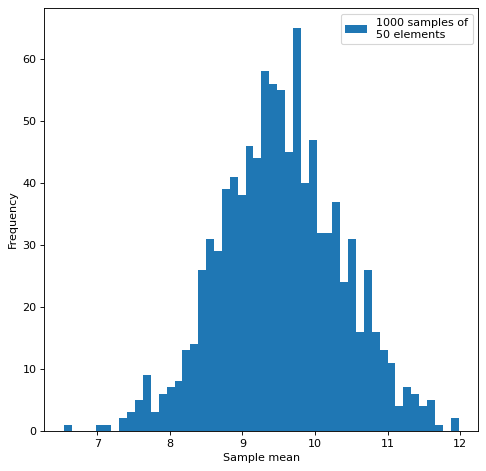

In [17]:
fig = plt.figure(figsize=(7, 7), dpi=80)
ax = fig.add_subplot(111)
x_1 = ax.hist(
    means,
    bins=50,
    label='1000 samples of\n' '50 elements'
)
xl = ax.set_xlabel('Sample mean')
yl = ax.set_ylabel('Frequency')
l = ax.legend()

#### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]


$ \begin{vmatrix}
1 - lambda & 4\\
1 & 1 - lambda
\end{vmatrix}  = 0 $

$(1-\lambda)\cdot(1-\lambda) - 4 = 0 $

$\lambda^2 - 2\lambda - 3 = 0 $

$ \lambda_1 = 3; \lambda_2 = -1 $

In [18]:
np.linalg.eig(np.array([[1,4], [1, 1]]))

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))